# Classification Tree 分類 (有答案)

[Google: sklearn datasets](https://scikit-learn.org/stable/datasets/index.html#toy-datasets)

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 資料表格化：pandas

In [2]:
import pandas as pd

df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
# df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# 相關係數矩陣：df.corr()。調用時，建議將數值轉為「浮點數」
df.astype(float).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


### 資料視覺化：matplotlib & seaborn
- 魔法函式：`%matplotlib inline`    
  特殊功能：在 jupyter 中可以內嵌繪圖，省略掉 `plt.show()`

- 修改圖表大小：`plt.figure(figsize=(寬,高))`

- 修改圖表顏色：[`cmap=顏色`](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html#lightness-of-matplotlib-colormaps)

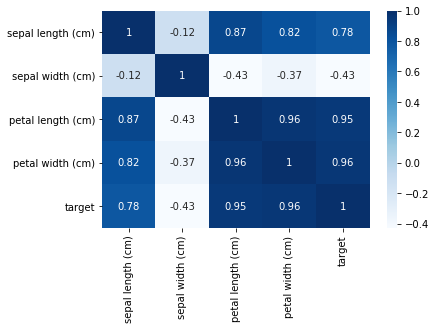

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(df.astype(float).corr(), annot=True, cmap='Blues')

## STEP
1. **處理資料**：  
   將資料 `train_test_split(特徵, 目標, test_size=0.1)` 切成二份，  
   90% 資料做為訓練模型（train）、10% 資料做為驗證結果（test）； x 表示特徵/題目， y 表示目標/答案 


2. **訓練模型**：  
   決策樹（[`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier)）  
   用 90% 題目和 90% 答案 訓練模型 `clf.fit(x_train, y_train)` 


3. **預測結果**：  
   用訓練好的模型 預測結果 `clf.predict(x_test)`


4. **驗證模型**：  
   比對預測結果和真正標籤 驗證模型 `accuracy_score(pre, y_test)`  
   `accuracy_score` 是一種衡量標準，用以衡量預測成功機率  
   若要瞭解哪些分類容易被混淆，可使用 [`confusion_matrix(y_test, pre)`](https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn%20metrics#sklearn-metrics-metrics)


5. **畫圖**：  
   利用 [graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) 畫出決策樹  

   
   
## NOTE  
1. 純度 $ gini = \sum p \times (1-p)$ ，（照著機率猜的）平均錯誤率，越小越好  
   亂度 $ entropy = \sum p \times log_2(\frac{1}{p})$ ，1 最好，0 最差  
     

2. 訓練模型時有以下三種情況，只有「擬合」時，預測才會準確  
   (1) 欠擬合：depth 太淺  
   (2) 擬　合：depth 剛好   
   (3) 過擬合：depth 太深（考慮離群值）  
     

3. 為了防止「過擬合（overfitting）」所以要「剪枝」：  
   (1) 前剪枝：設定最大深度（`max_depth`），控制決策樹最多長幾層  
   (2) 後剪枝：針對樹的每個點，選擇要不要留下來  
     

4. 如何決定 depth？只能透過**經驗**調整或**窮舉法**得知，沒有公式  
   如果是小命題可以從 `max_depth=3` 開始，大命題可以從 `max_depth=5` 開始  
     

5. 決策樹的優點：可解釋性（可借鑑，可以告訴人類為什麼會這樣）  
   決策樹的缺點：依賴於經驗法則

In [5]:
from sklearn.model_selection import train_test_split

# train_test_split -> (90%特徵, 10%特徵, 90%目標, 10%目標)
# x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"], axis=1), df["target"], test_size=0.1)
x_train, x_test, y_train, y_test = train_test_split(iris["data"], iris["target"], test_size=0.1)

In [6]:
from sklearn.tree import DecisionTreeClassifier

# 防止過擬合，故做前剪枝：max_depth=2 
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
pre = clf.predict(x_test)
print('預測結果：', list(pre))
print('真正標籤：', list(y_test))

預測結果： [2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2]
真正標籤： [2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2]


In [8]:
from sklearn.metrics import accuracy_score
score = accuracy_score(pre, y_test)
print('預測成功機率/正確率：', score)

預測成功機率/正確率： 1.0


In [9]:
from sklearn.metrics import confusion_matrix

print('分類準確性評估：')
c = [f"{s}(predict)" for s in iris["target_names"]]
r = [f"{s}(target)"  for s in iris["target_names"]]
pd.DataFrame(confusion_matrix(y_test, pre), columns=c, index=r)

分類準確性評估：


,setosa(predict),versicolor(predict),virginica(predict)
setosa(target),7,0,0
versicolor(target),0,1,0
virginica(target),0,0,7


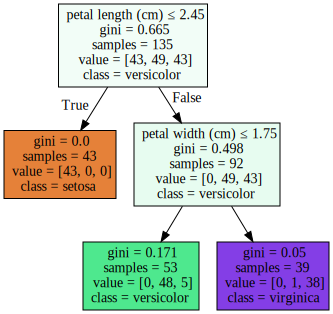

In [10]:
import graphviz
from sklearn.tree import export_graphviz

g = export_graphviz(clf, 
                    feature_names=iris["feature_names"],
                    class_names=iris["target_names"],
                    filled=True,
                    special_characters=True
                    )
graphviz.Source(g)